# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

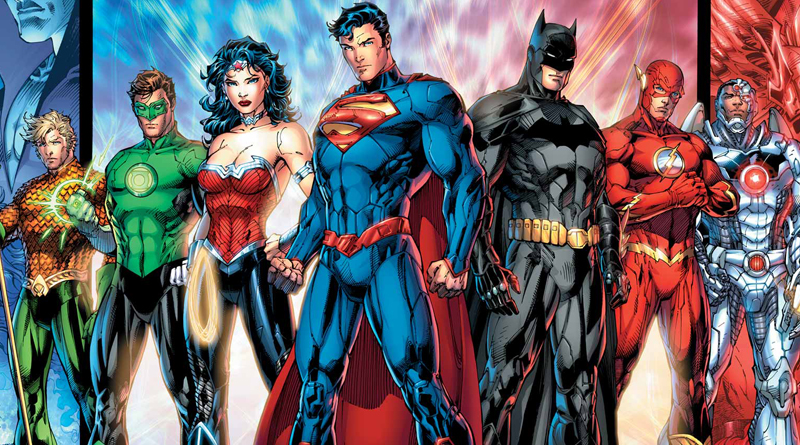

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [3]:
heroes_df.head(3)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0


In [4]:
powers_df.head(3)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [5]:
heroes_df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
heroes_df.head(3)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [7]:
# heroes_df
print('*** Shape ***')
print(heroes_df.shape)
print('\n*** Summary Metadata ***')
print(heroes_df.info())
print('\n*** Summary Statistics ***')
print(heroes_df.describe())      

*** Shape ***
(734, 10)

*** Summary Metadata ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB
None

*** Summary Statistics ***
           Height      Weight
count  734.000000  732.000000
mean   102.254087   43.855191
std    139.624543  130.823733
min    -99.000000  -99.000000
25%    -99.000000  -99.000000
50%    175.000000   62.000000
75%    185.000000   90.000000
max    975.000000  900.000000


In [8]:
# powers_df
print('*** Shape ***')
print(powers_df.shape)
print('\n*** Summary Metadata ***')
print(powers_df.info())
print('\n*** Summary Statistics ***')
print(powers_df.describe())   

*** Shape ***
(667, 168)

*** Summary Metadata ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB
None

*** Summary Statistics ***
            hero_names Agility Accelerated Healing Lantern Power Ring  \
count              667     667                 667                667   
unique             667       2                   2                  2   
top     Ghost Rider II   False               False              False   
freq                 1     425                 489                656   

       Dimensional Awareness Cold Resistance Durability Stealth  \
count                    667             667        667     667   
unique                     2               2          2       2   
top                    False           False      False   False   
freq                     642             620        410     541   

       Energy Absorption Flight    ...    

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

### Dataframe heroes_df

In [9]:
# 1. Check for null values:
print('\n*** Missing Values ***')
print(heroes_df.isna().sum())
print('\n*** Summary Statistics for Height and Weight ***')
print(heroes_df.describe())


*** Missing Values ***
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

*** Summary Statistics for Height and Weight ***
           Height      Weight
count  734.000000  732.000000
mean   102.254087   43.855191
std    139.624543  130.823733
min    -99.000000  -99.000000
25%    -99.000000  -99.000000
50%    175.000000   62.000000
75%    185.000000   90.000000
max    975.000000  900.000000


In [10]:
# Checking the null values in "Publishers" (categorical data)
heroes_df.loc[heroes_df.Publisher.isna()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0


In [11]:
# Checking the null values in "Weight" (numerica data)
heroes_df.loc[heroes_df.Weight.isna()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
389,King Kong,Male,yellow,Animal,Black,30.5,NaN,-,good,NaN


In [12]:
# Strategy with null values in Publisher: convert them into placeholders as there are pretty interesting
# heroes I don't want to lose in my data ....
heroes_df.loc[heroes_df.Publisher.isna(), "Publisher"] = "Unknown"

In [13]:
# Strategy with null values in Weight: delete these as there are only 2 of them (Godzillo & Kink Kong)
heroes_df.dropna(inplace=True)

In [14]:
# Check this dataframe again
print('\n*** Missing Values AFTER CLEANING ***')
print(heroes_df.isna().sum())


*** Missing Values AFTER CLEANING ***
name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64


In [15]:
# 2. Checking for outliers ...

In [16]:
# ... in Gender (categorical data)
print('\n*** Unique Values for Gender ***')
print(heroes_df.Gender.value_counts())


*** Unique Values for Gender ***
Male      504
Female    200
-          28
Name: Gender, dtype: int64


In [17]:
# Strategy with third category "-" in gender: 
# For the moment I'll keep it as it might be normal with superheroes ...

In [18]:
# ... in Height & Weight (numerical data)
subsets = ["Height", "Weight"]
heroes_df[subsets].describe()

,Height,Weight
count,732.000000,732.000000
mean,102.344262,43.855191
std,139.790036,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [19]:
heroes_df.query("Height <= 0")['Height'].value_counts()

-99.0    217
Name: Height, dtype: int64

In [20]:
# Ooh, look! All values below 0 are -99.0, meaning this exact and impossible height was used as a placeholder.

In [21]:
# Is it the same with the weight? Yes!
heroes_df.query("Weight <= 0")['Weight'].value_counts()

-99.0    237
Name: Weight, dtype: int64

In [22]:
# Strategy with these outliers: 
# Make a "clean" subset out of later analysis with height and weight.
heroes_df_clean = heroes_df[(heroes_df['Height'] > 0) & (heroes_df['Weight'] > 0)]
subsets = ["Height", "Weight"]
heroes_df_clean[subsets].describe()

,Height,Weight
count,490.000000,490.000000
mean,187.123878,112.179592
std,58.990016,104.422653
min,15.200000,4.000000
25%,173.500000,61.000000
50%,183.000000,81.000000
75%,188.000000,106.000000
max,975.000000,900.000000


### Dataframe powers_df

In [23]:
# Check dataframe powers_df:
print('\n*** Missing Values ***')
print(powers_df.isna().sum())


*** Missing Values ***
hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
Cold Resistance          0
Durability               0
Stealth                  0
Energy Absorption        0
Flight                   0
Danger Sense             0
Underwater breathing     0
Marksmanship             0
Weapons Master           0
Power Augmentation       0
Animal Attributes        0
Longevity                0
Intelligence             0
Super Strength           0
Cryokinesis              0
Telepathy                0
Energy Armor             0
Energy Blasts            0
Duplication              0
Size Changing            0
Density Control          0
Stamina                  0
Astral Travel            0
Audio Control            0
Dexterity                0
                        ..
Intuitive aptitude       0
Vision - Microscopic     0
Melting                  0
Wind Control             0
Super Breath             0
Wall

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider setting the the column you want to join on as the index for each DataFrame.  

### a) The "uncleanly" merge

In [24]:
# Both dataframes are complimentary with 734 resp. 667 rows (= superheroes).
# An Inner Join returns only the records with matching keys in both tables, so I take this sort of join.
# It makes sense to join on "names" resp. "hero_names".
# To avoid renaming the columns, instead of the join-method, I'll take the merge method:

df_comb = pd.DataFrame.merge(heroes_df, powers_df, left_on='name', right_on='hero_names', how='inner')

In [25]:
df_comb.head(2)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False


In [26]:
print(df_comb.shape)

(658, 178)


If I wanted to use join, I had to rename the columns first like this:
* `powers_df.rename(index=str, columns={"hero_names": "name"}, inplace=True)`
* `heroes_df.set_index("name", inplace=True)`
* `powers_df.set_index("name", inplace=True)`
* `df = heroes_df.join(powers_df, how='inner')`

### b) The "cleanly" merge

In [27]:
# And for analysis of weight and height, I also join the "cleaned" hero dataset to a "cleaned" combined dataset
# So I have 2 joined datasets and I can decide which I'm working with.
df_comb_clean = pd.DataFrame.merge(heroes_df_clean, powers_df, left_on='name', right_on='hero_names', how='inner')

In [28]:
df_comb_clean.head(2)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False


In [29]:
print(df_comb_clean.shape)

(463, 178)


### -->  Working with the "uncleanly" merged dataset

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [30]:
df_comb_clean.groupby('Gender')[['Height', 'Weight']].mean()

,Height,Weight
Gender,,
-,186.375000,161.875000
Female,173.847015,79.343284
Male,193.499065,126.682243


In [31]:
plt.style.use('seaborn-white')

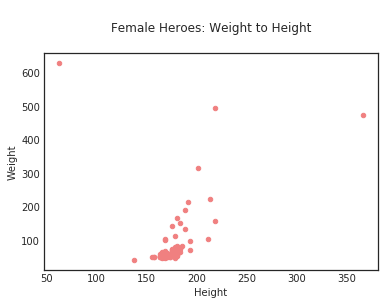

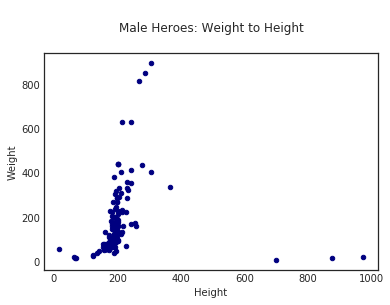

In [32]:
# Scatterplot No. 1
df_comb_clean.loc[df_comb_clean['Gender'] == 'Female'].plot.scatter('Height', 'Weight', color='lightcoral', title='\nFemale Heroes: Weight to Height\n')
df_comb_clean.loc[df_comb_clean['Gender'] == 'Male'].plot.scatter('Height', 'Weight', color='navy', title='\nMale Heroes: Weight to Height\n');

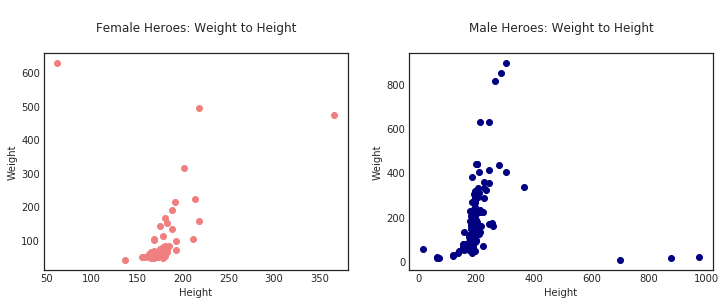

In [33]:
# Scatterplot No. 2
fig = plt.figure(figsize = (12,4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

x1 = df_comb_clean.loc[df_comb_clean['Gender'] == 'Female']['Height']
y1 = df_comb_clean.loc[df_comb_clean['Gender'] == 'Female']['Weight']
x2 = df_comb_clean.loc[df_comb_clean['Gender'] == 'Male']['Height']
y2 = df_comb_clean.loc[df_comb_clean['Gender'] == 'Male']['Weight']

ax1.scatter(x1, y1, color='lightcoral')
ax1.set_title('\nFemale Heroes: Weight to Height\n')
ax1.set_xlabel('Height')
ax1.set_ylabel('Weight')

ax2.scatter(x2, y2, color='navy')
ax2.set_title('\nMale Heroes: Weight to Height\n')
ax2.set_xlabel('Height')
ax2.set_ylabel('Weight');

<Figure size 864x288 with 0 Axes>

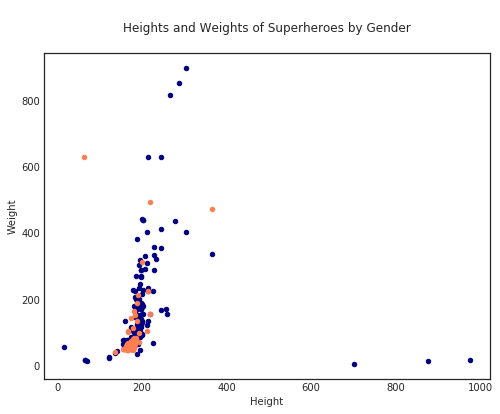

In [34]:
# Scatterplot No. 3 - both data in one
fig = plt.figure(figsize = (12,4))

ax1 = df_comb_clean.loc[df_comb_clean['Gender'] == 'Male'].plot.scatter('Height', 'Weight', color='navy', figsize=(8,6))
ax2 = df_comb_clean.loc[df_comb_clean['Gender'] == 'Female'].plot.scatter('Height', 'Weight', color='coral', ax=ax1)

plt.title("\nHeights and Weights of Superheroes by Gender\n")
plt.show();

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [35]:
male_heroes_df = df_comb_clean[df_comb_clean.Gender == 'Male']
female_heroes_df = df_comb_clean[df_comb_clean.Gender == 'Female']

In [36]:
def show_distplot(dataframe, gender, column_name):
    fig, ax = plt.subplots(figsize = (8,6))
    ax = sns.distplot(dataframe[column_name], color='sienna')
    ax.set_title(gender + " " + column_name + " Distplot")
    plt.show();
    return ax

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


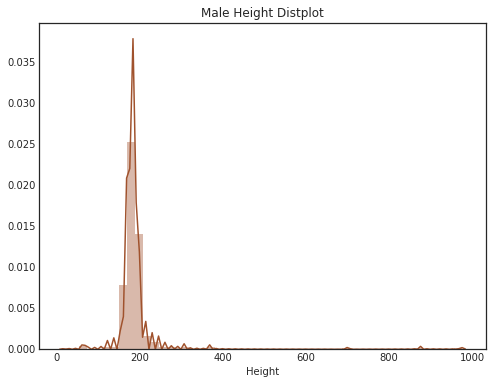

In [37]:
# Male Height
show_distplot(df_comb_clean, 'Male', 'Height')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


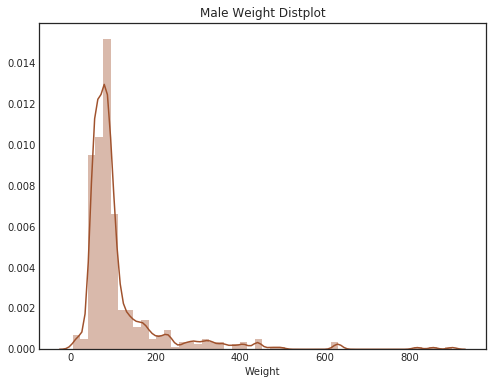

In [38]:
# Male Weight
show_distplot(df_comb_clean, 'Male', 'Weight')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


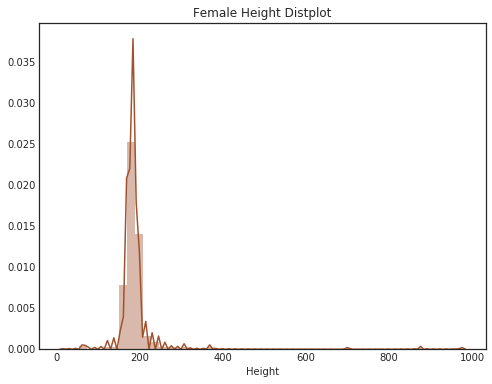

In [39]:
# Female Height
show_distplot(df_comb_clean, 'Female', 'Height')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


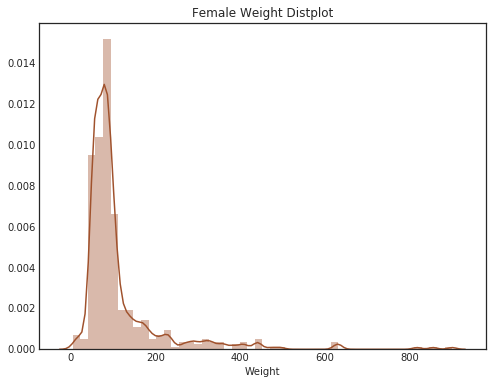

In [40]:
# Female Weight
show_distplot(df_comb_clean, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

### -->  Back to working with the "cleanly" merged dataset!

In [41]:
type(df_comb)

pandas.core.frame.DataFrame

In [42]:
df_comb.drop(['hero_names', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height', 'Skin color', 'Alignment', 'Weight'], axis=1, inplace=True)
df_comb.head(2)

,name,Publisher,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Marvel Comics,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Dark Horse Comics,True,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
# What are the 5 most common powers overall?
# 1. count all True values per column (=power) / 2. sort values / 3. display the 5 first rows

print('\n*** The 5 most common powers ***\n')
print(df_comb.sum(axis=0, numeric_only=True).sort_values(ascending=False).head(5))
print()


*** The 5 most common powers ***

Super Strength    360
Stamina           292
Durability        260
Super Speed       250
Agility           242
dtype: int64



In [44]:
# What are the 5 most common powers in the Marvel Universe?

# 1. Slice the dataframe I need: Marvel Comics
df_marvel = df_comb[df_comb.Publisher == 'Marvel Comics']

# 2. Then sum the True values, sort them and print out the first 5 rows
print('\n*** The 5 most common powers in the Marvel Universe ***\n')
print(df_marvel.sum(axis=0, numeric_only=True).sort_values(ascending=False).head(5))
print()


*** The 5 most common powers in the Marvel Universe ***

Super Strength    204
Durability        154
Stamina           150
Super Speed       137
Agility           126
dtype: int64



In [45]:
# What are the 5 most common powers in the DC Universe?

# 1. Slice the dataframe I need: DC Comics
df_dc = df_comb[df_comb.Publisher == 'DC Comics']

# 2. Then sum the True values, sort them and print out the first 5 rows
print('\n*** The 5 most common powers in the DC Universe ***\n')
print(df_dc.sum(axis=0, numeric_only=True).sort_values(ascending=False).head(5))
print()


*** The 5 most common powers in the DC Universe ***

Super Strength    109
Stamina            90
Flight             86
Super Speed        79
Agility            71
dtype: int64



Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:

**Marvel and DC have similar powers and really fit the overall trend!**


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

### What is the relationship between gender and alignment? Who is more "good" and who more "bad"?

In [46]:
# make the merge again to gain the Gender column that I dropped inplace earlier
df_comb = pd.DataFrame.merge(heroes_df, powers_df, left_on='name', right_on='hero_names', how='inner')

In [47]:
# using a new method to plot: plotly, especially useful for use in Jupyter notebooks
import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [48]:
# collecting all male and female values from 'Gender'
male = df_comb[df_comb.Gender == 'Male']
female = df_comb[df_comb.Gender == 'Female']

# creating data trace for male alignments: counting the values and transform them into percentages
trace_m = go.Bar(x = male['Alignment'].value_counts(normalize=True).index,
                 y = male['Alignment'].value_counts(normalize=True).values,
                 name='male')

# creating data trace for female alignments 
trace_f = go.Bar(x = female['Alignment'].value_counts(normalize=True).index,
                 y = female['Alignment'].value_counts(normalize=True).values,
                 name='female')

# gathering data from trace_m and trace_f to transfer to bar graph data and layout
data = [trace_m, trace_f]
layout = go.Layout(title = 'Alignment of Superheroes by Gender',
                   barmode = 'group', height = 500, width = 800)

# plotting bar graph 
figure = go.Figure(data = data, layout = layout)
plotly.offline.iplot(figure)

As in real life: women are better!
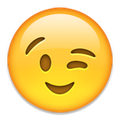

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data